In [20]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

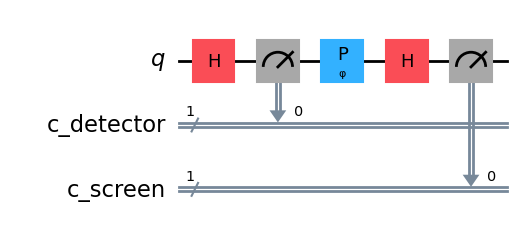

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

# Setup
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')  # which-path detector
cr2 = ClassicalRegister(1, name='c_screen')    # final measurement
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

# your code here

# Step 1: Put particle in superposition (pass through both slits)
double_slit_with_detector.h(qr[0])

# Step 2: Which-path measurement (collapses the superposition)
double_slit_with_detector.measure(qr[0], cr1[0])

# Step 3: Apply phase (if any)
double_slit_with_detector.p(φ, qr[0])

# Step 4: Recombine at the screen (apply second Hadamard)
double_slit_with_detector.h(qr[0])

# Step 5: Final screen measurement
double_slit_with_detector.measure(qr[0], cr2[0])

# end of your code

# Draw the circuit
double_slit_with_detector.draw('mpl')


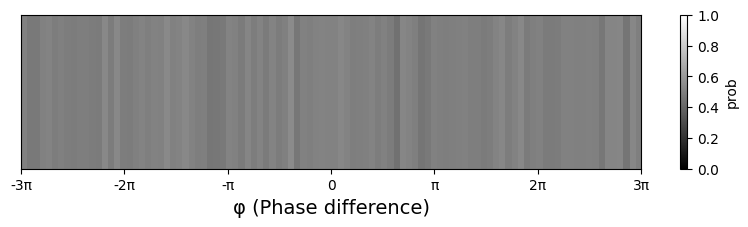

In [22]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()